In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Implement kmean algorithm by Numpy.

In [3]:
# Helper function

def euclidean_distance(x1, x2):
  '''Compute distance between two points'''
  return np.sqrt(np.sum((x1 - x2)**2))

In [4]:
class K_Means:
  def __init__(self, K= 2, max_iters= 100, plot_steps= False):
    self.K = K 
    self.max_iters = max_iters
    self.plot_steps = plot_steps 
    self.clusters = [[] for _ in range(self.K)]
    self.centroids = []

  def fit(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape 

    # Random Centroid Initialization
    random_sample_idx = np.random.choice(self.n_samples, self.K, replace= False) 
    self.centroids = [self.X[idx] for idx in random_sample_idx] 

    # Clusters Optimization
    for _ in range(self.max_iters):
      # assign data points to closest centroids (form clusters)
      self.clusters = self._form_clusters(self.centroids)

      if self.plot_steps:
        self.plot()

      # calculate new centroids
      old_centroids = self.centroids 
      self.centroids = self._get_centroids(self.clusters)

      if self._is_converged(old_centroids, self.centroids):
        break

      if self.plot_steps:
        self.plot()
    
    # Classify samples as the index of their clusters
    return self._get_cluster_labels(self.clusters)

  def _form_clusters(self, centroids):
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      centroid_idx = self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self, sample, centroids):
    distances = [euclidean_distance(sample, centroid) for centroid in centroids]
    closest_centroid_idx = np.argmin(distances)
    return closest_centroid_idx

  def _get_centroids(self, clusters):
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis= 0)
      centroids[cluster_idx] = cluster_mean
    return centroids 

  def _is_converged(self, old_centroids, centroids):
    distances = [euclidean_distance(old_centroids[i], centroids[i]) for i in range(self.K)]
    return sum(distances) == 0

  def _get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            labels[sample_idx] = cluster_idx
    return labels

  def plot(self):
    fig, ax = plt.subplots(figsize= (12, 8))

    for i, idx in enumerate(self.clusters):
      point = self.X[idx].T
      ax.scatter(*point)

    for point in self.centroids:
      ax.scatter(*point, marker= "x", color= "black", linewidth= 2)

    plt.show()

# 2. Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply kmean algorithm built in the first question? Try different number of cluster to see how the result change?

In [5]:
# Create three toy datasets
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples= 100,
                    n_features= 2,
                    centers= 3,
                    shuffle=True, 
                    random_state=40)

print("Features:\n", X1[:5])
print("Target:\n", y1[:5])

Features:
 [[-2.94305724 -4.56159935]
 [-1.30337776 -8.9771589 ]
 [-0.13511804 -3.15334516]
 [ 2.88970296 -4.26961959]
 [ 4.18260704 -5.1819068 ]]
Target:
 [2 0 2 1 1]


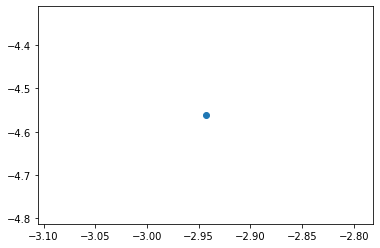

In [6]:
plt.scatter(*X1[0].T)

In [7]:
X2, y2 = make_blobs(n_samples= 100,
                    n_features= 2,
                    centers= 5,
                    shuffle=True, 
                    random_state=40)

print("Features:\n", X2[:5])
print("Target:\n", y2[:5])

Features:
 [[-1.91709047 -6.35880703]
 [-0.33226927  1.41718777]
 [-1.7694279  -9.32767997]
 [ 7.4584847  -5.30050985]
 [ 4.23289146  3.55800723]]
Target:
 [2 3 0 1 4]


In [8]:
X3, y3 = make_blobs(n_samples= 100,
                    n_features= 2,
                    centers= 4,
                    shuffle=True, 
                    random_state=40)

print("Features:\n", X3[:5])
print("Target:\n", y3[:5])

Features:
 [[-1.406291   -3.69019344]
 [ 6.30257159 -5.27091977]
 [ 0.27105523  1.08135882]
 [-1.81453265 -7.62003933]
 [-1.59195501  4.38440315]]
Target:
 [2 1 3 0 3]


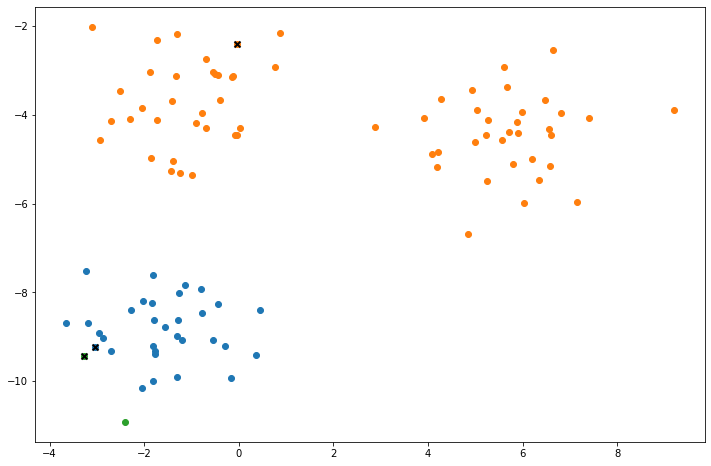

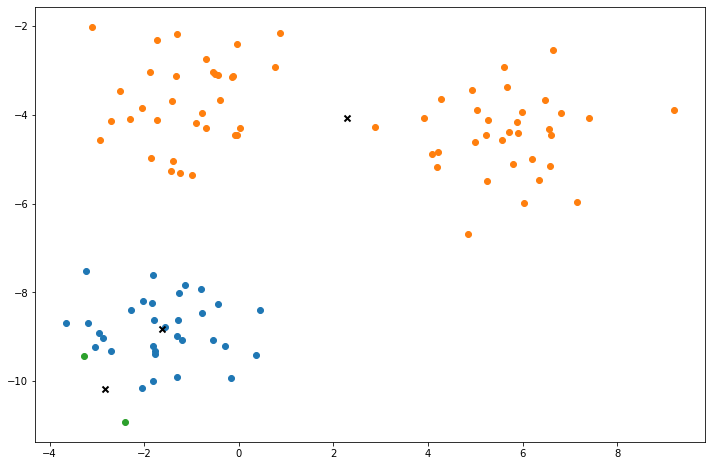

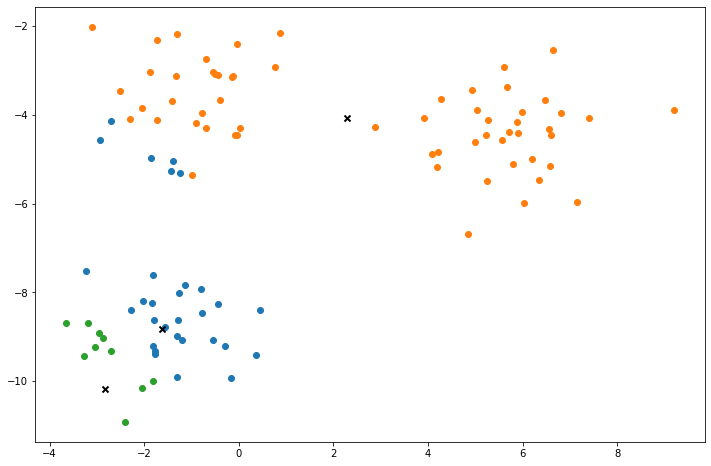

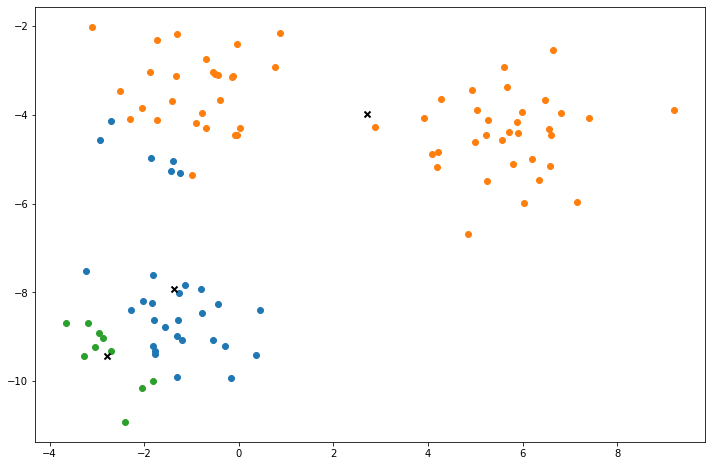

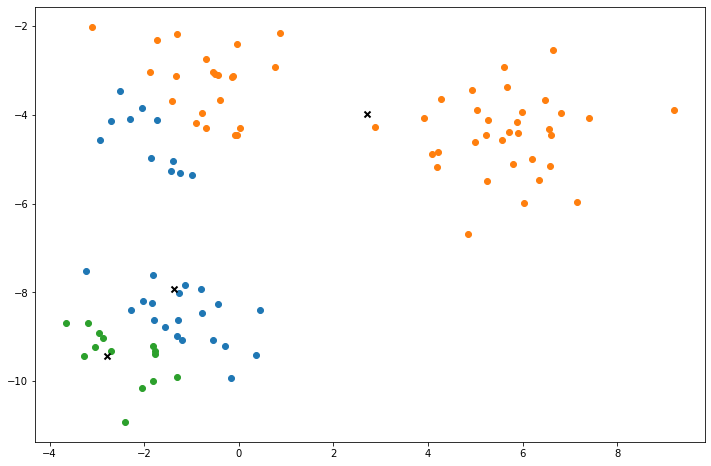

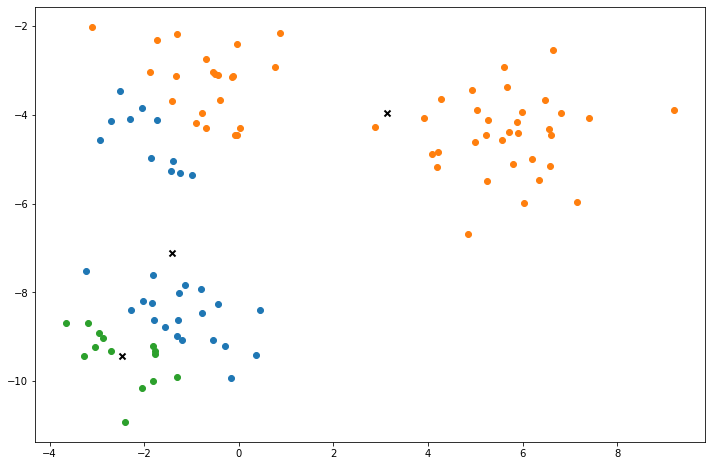

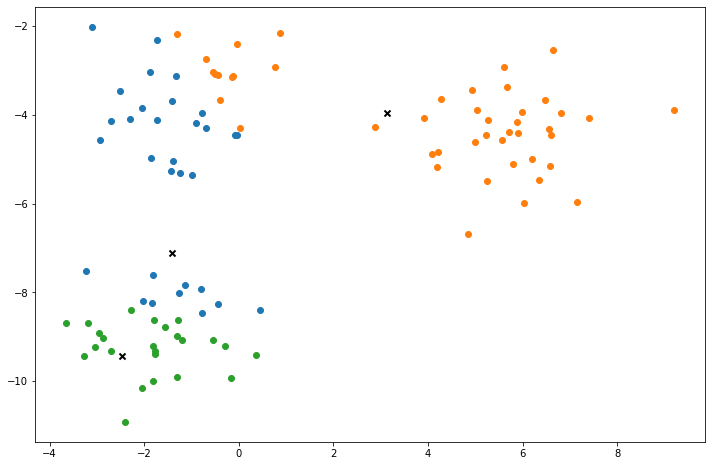

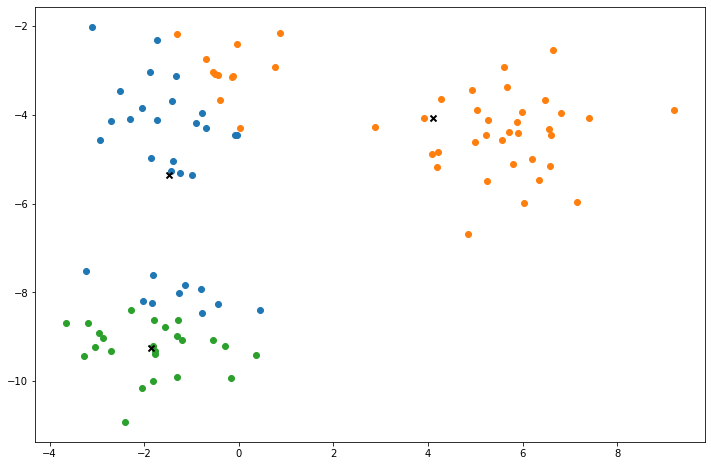

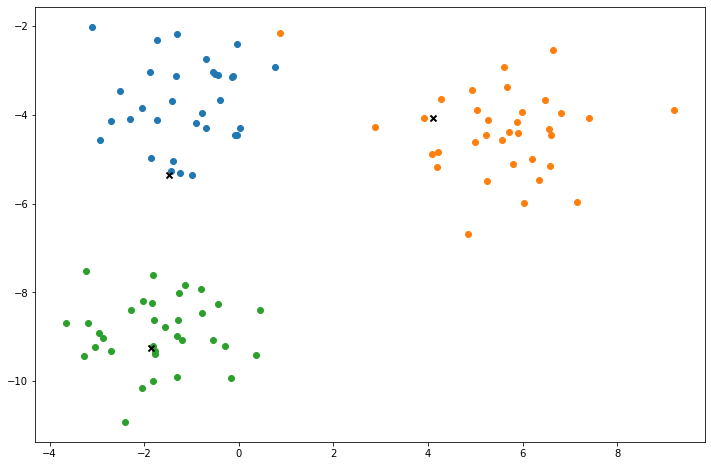

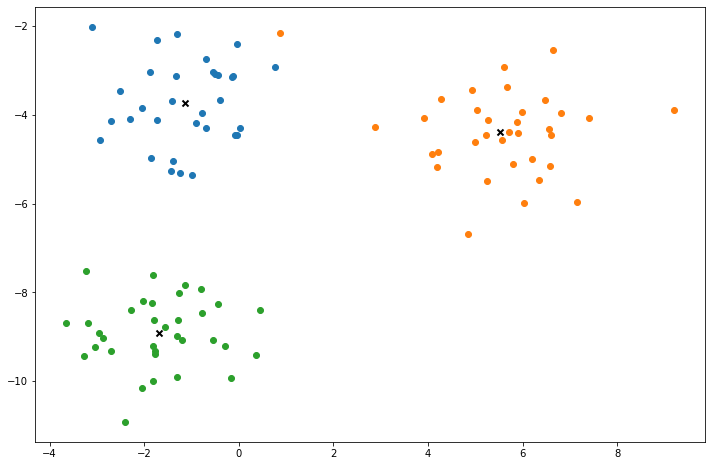

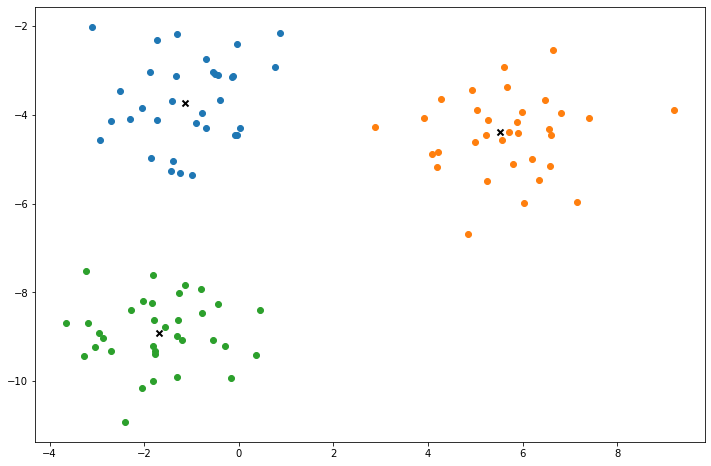

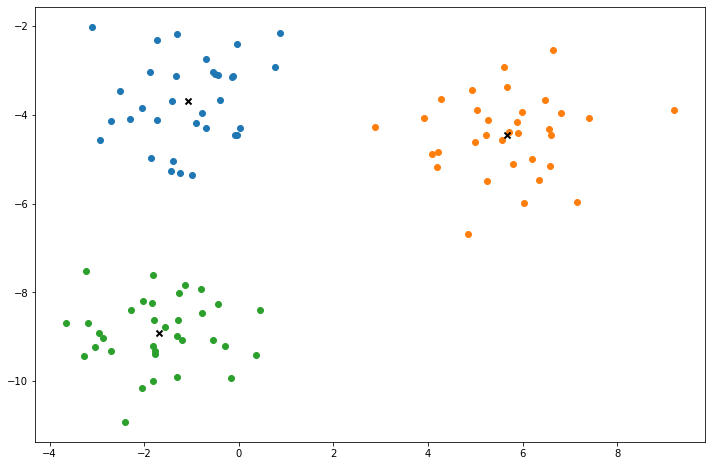

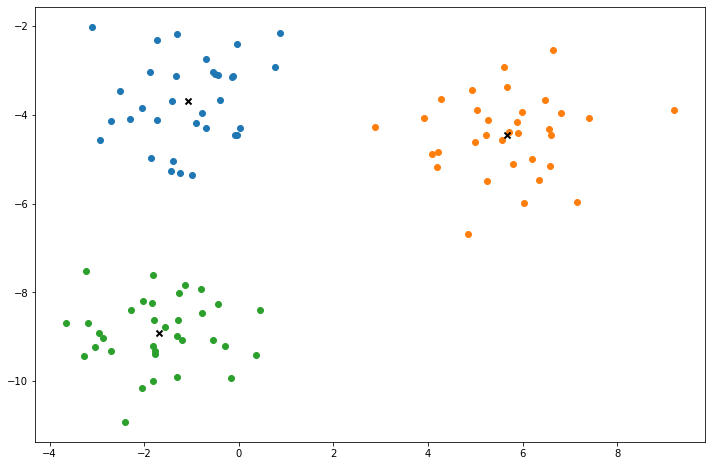

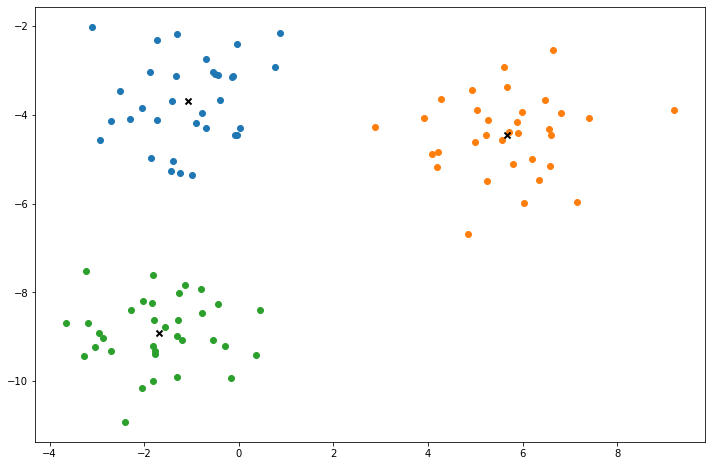

In [9]:
# Appy kmean algorithm built in the first question 
# 1st toy dataset 
clusters = len(np.unique(y1))
k = K_Means(K=clusters, max_iters=150, plot_steps= True)
y_pred = k.fit(X1)

k.plot()

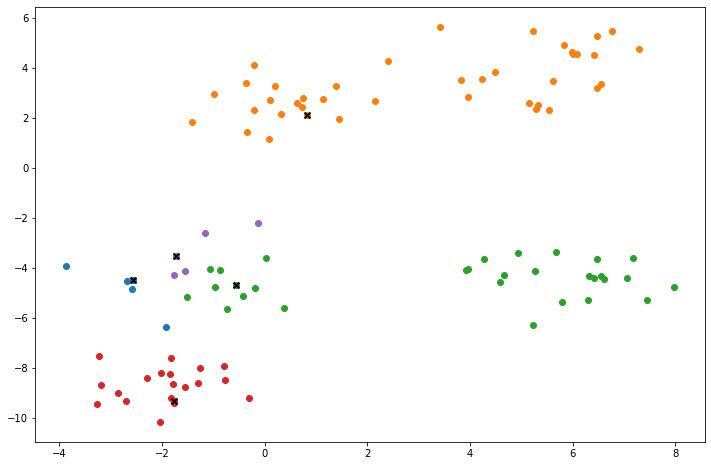

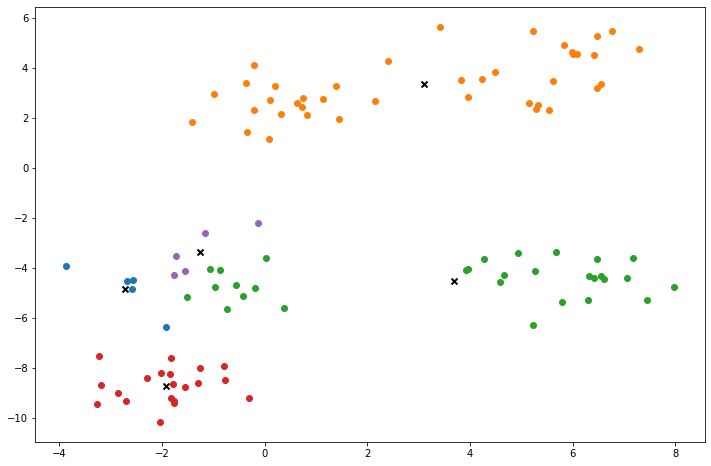

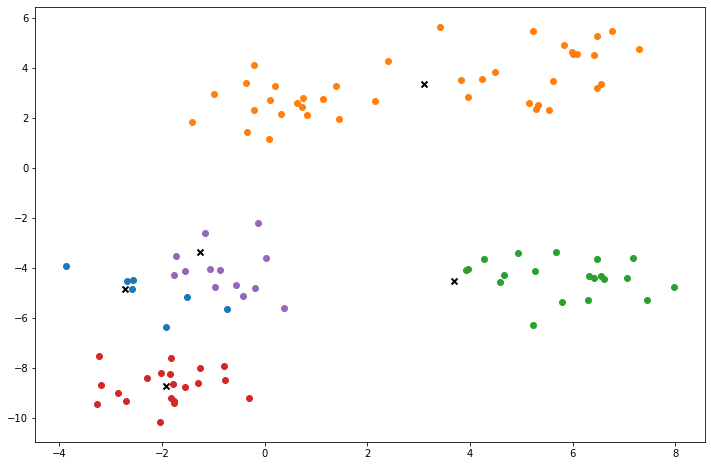

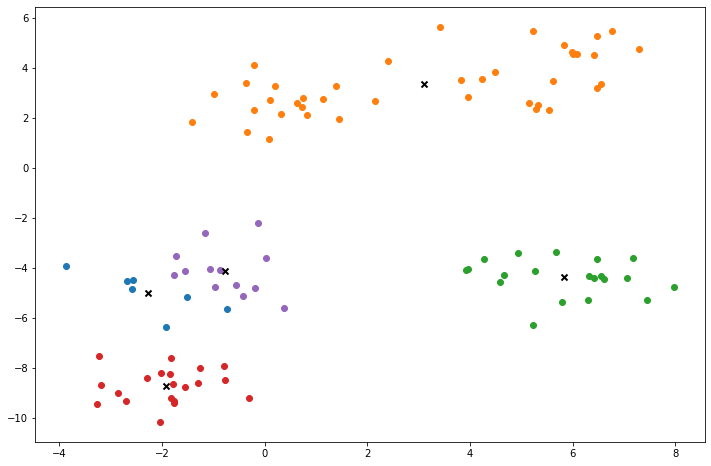

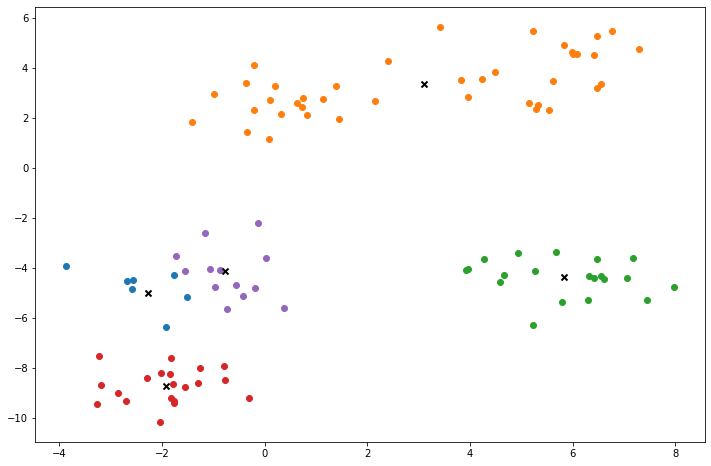

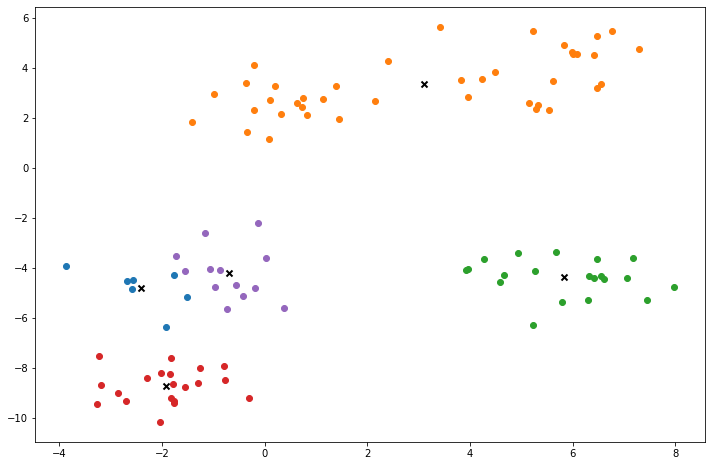

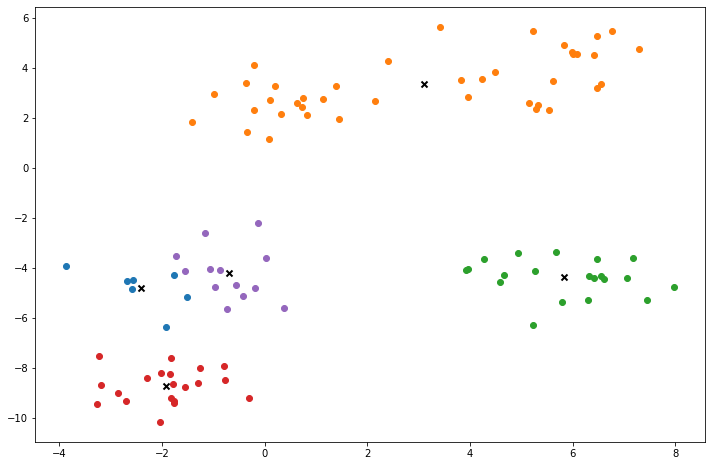

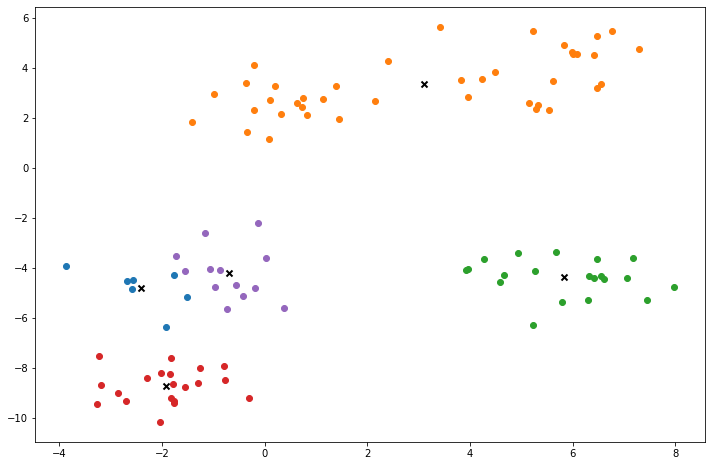

In [10]:
clusters = len(np.unique(y2))
k = K_Means(K= clusters, max_iters= 150, plot_steps= True)
y_pred = k.fit(X2)

k.plot()

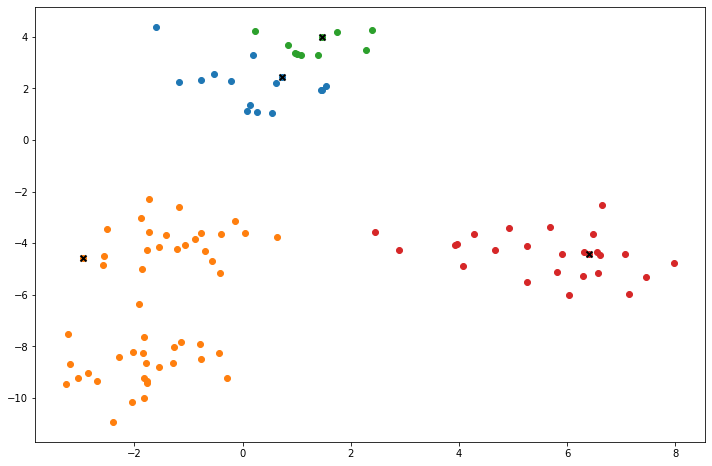

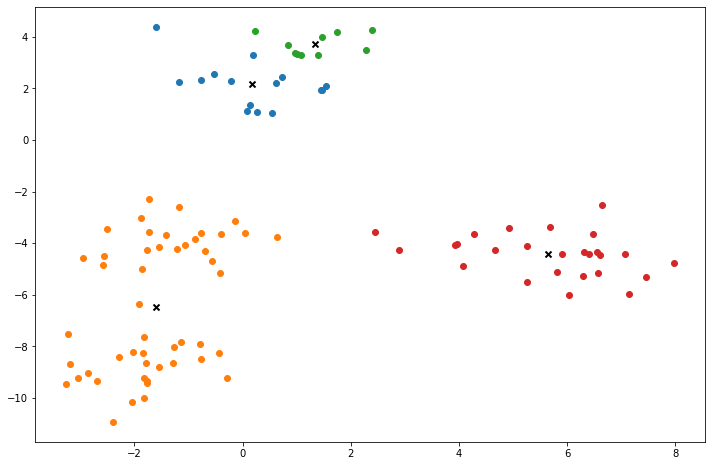

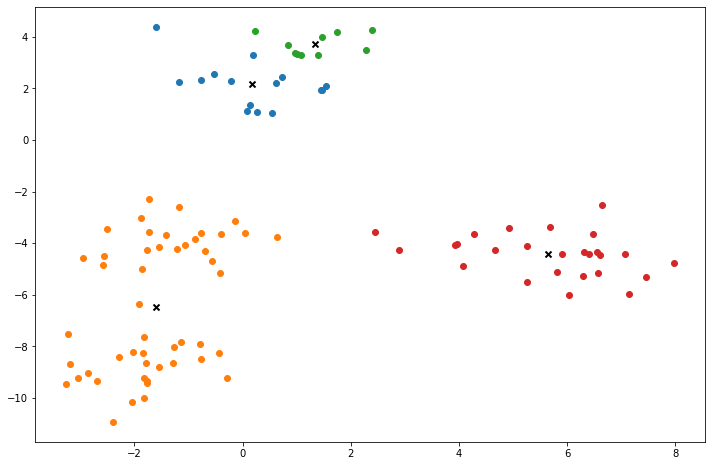

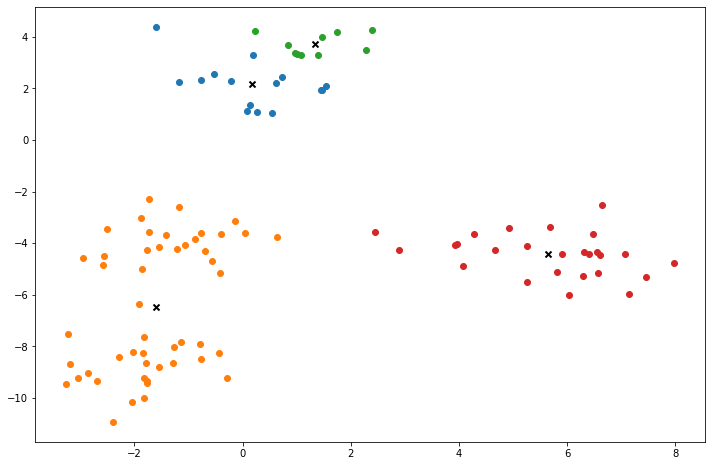

In [11]:
clusters = len(np.unique(y3))
k = K_Means(K= clusters, max_iters= 150, plot_steps= True)
y_pred = k.fit(X3)

k.plot()

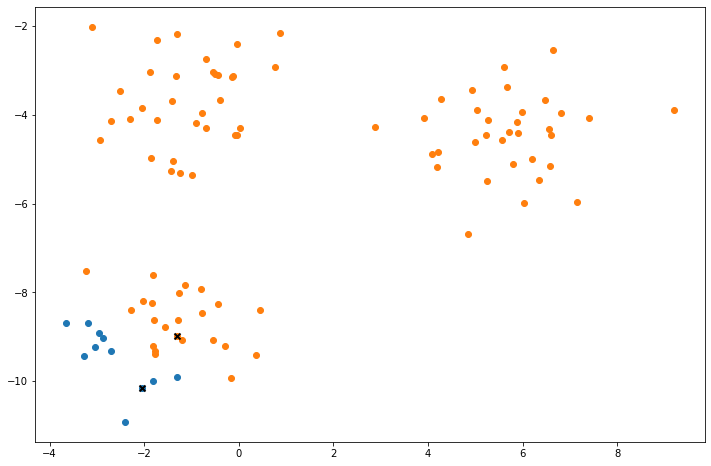

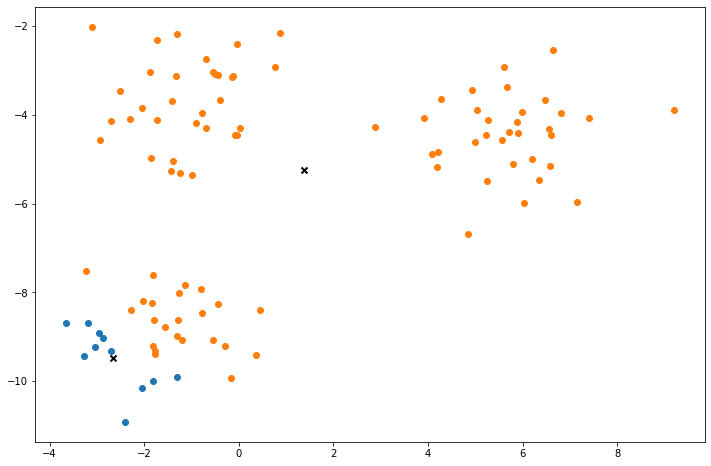

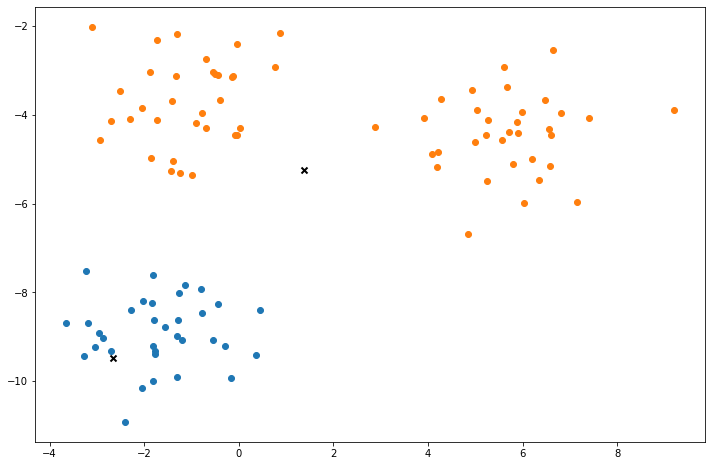

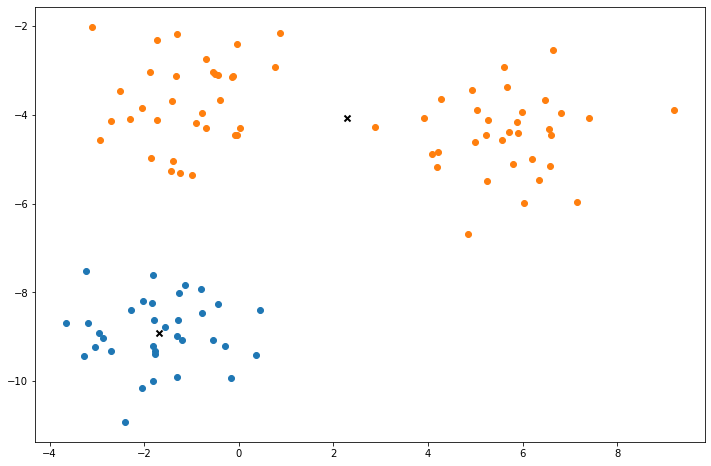

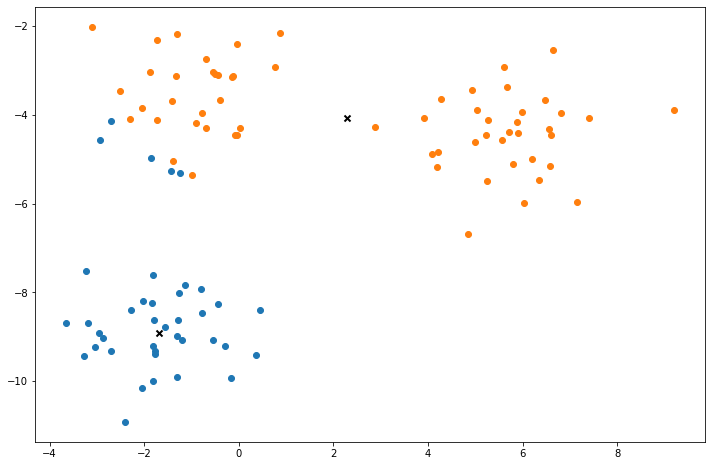

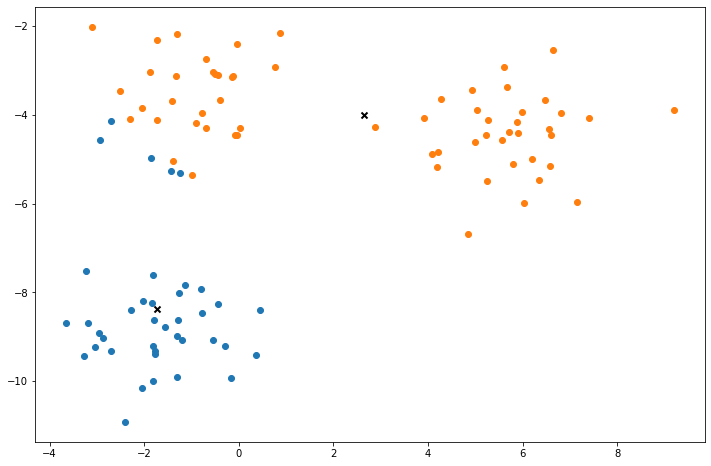

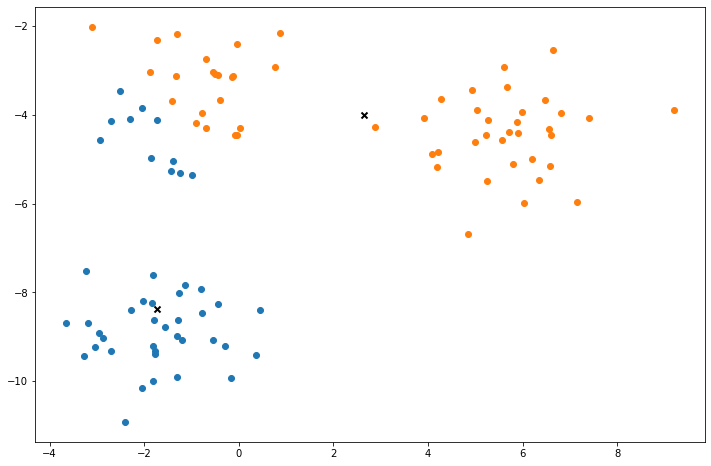

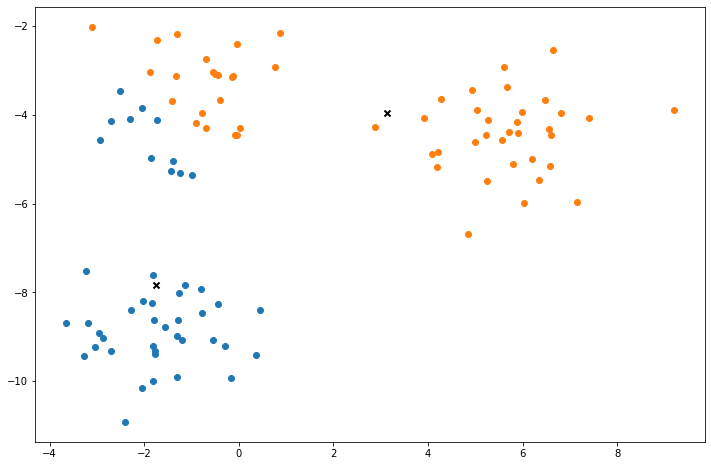

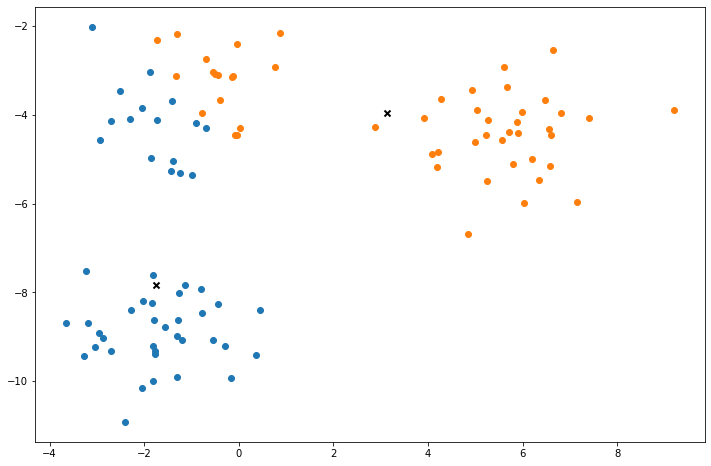

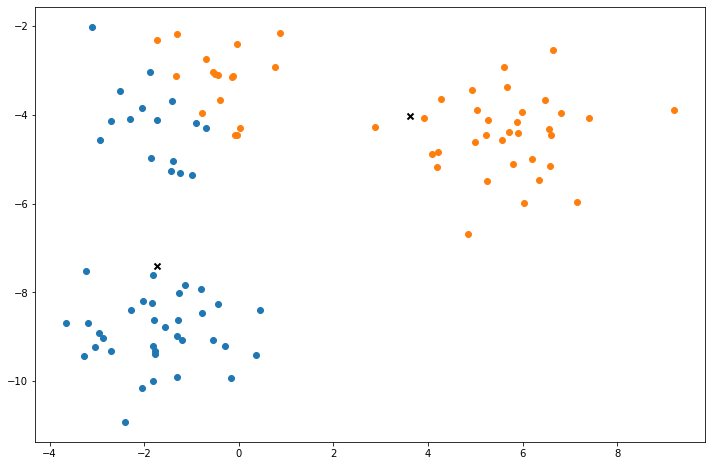

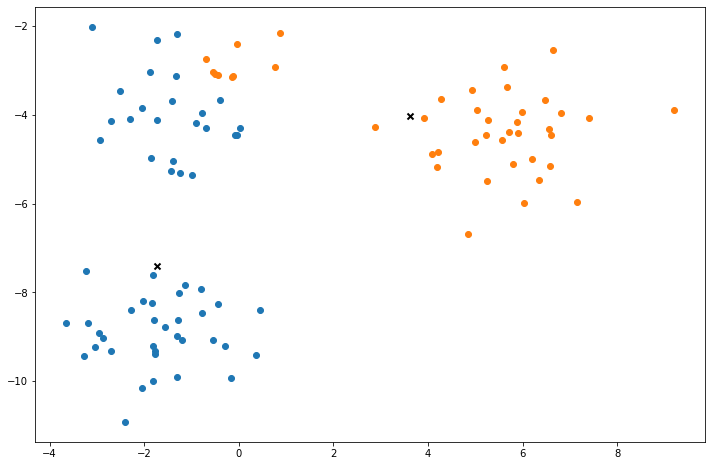

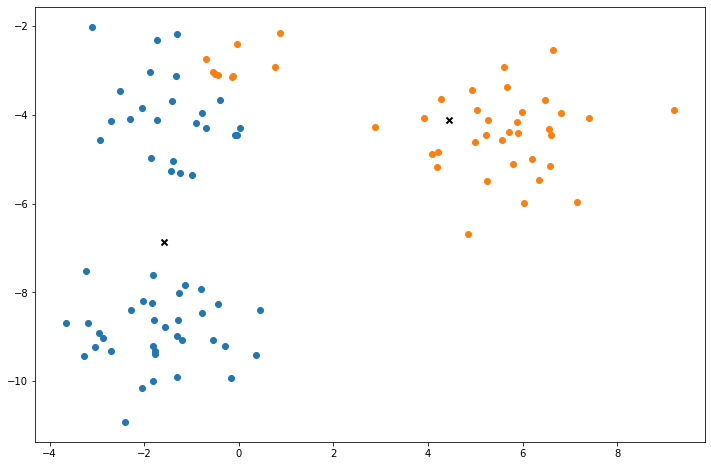

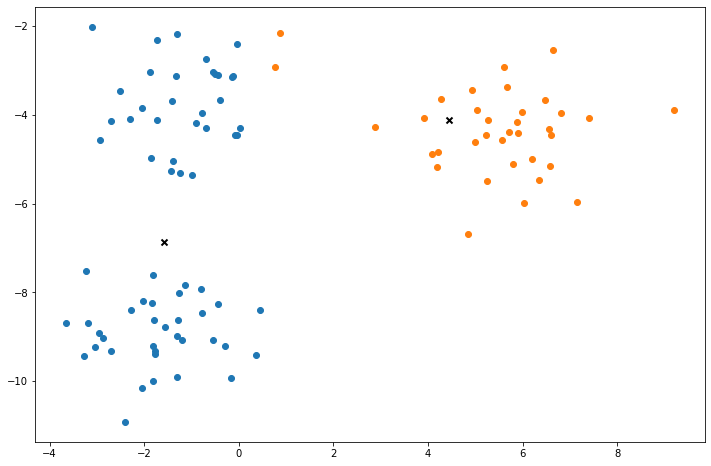

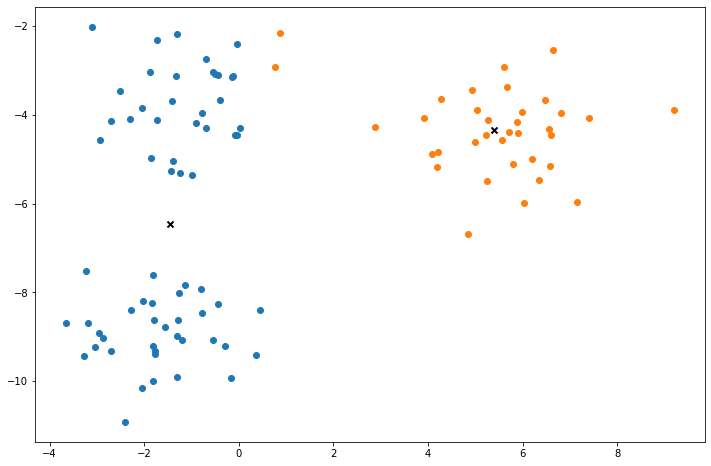

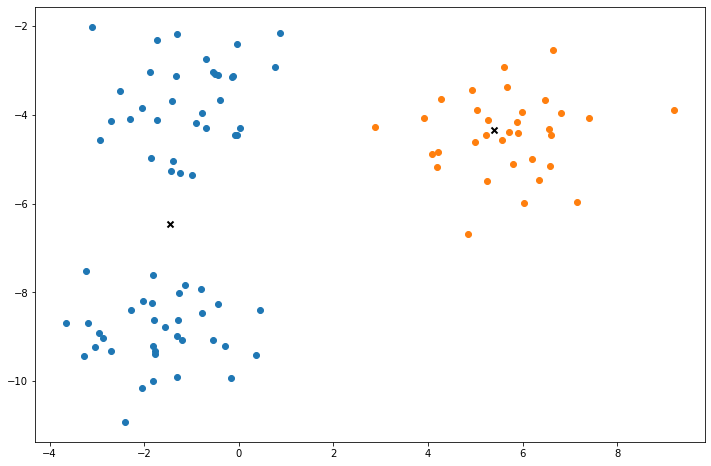

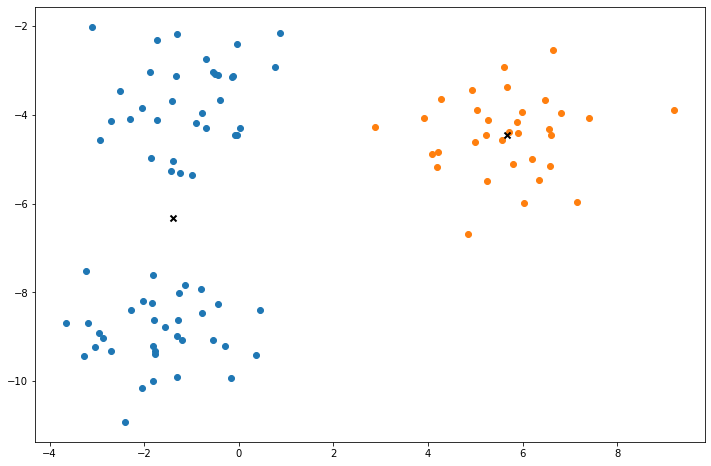

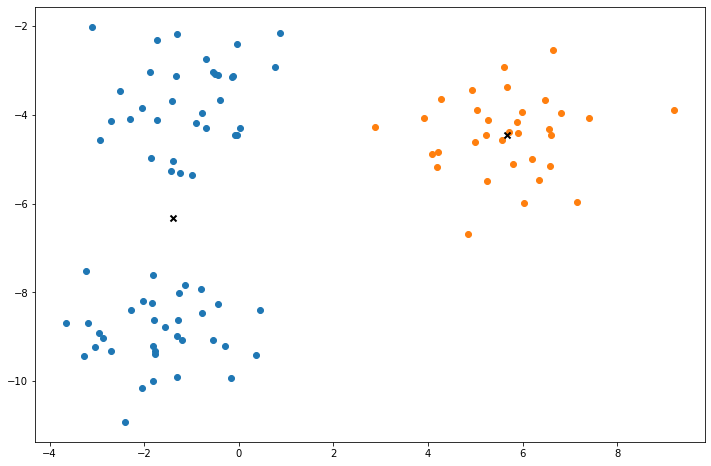

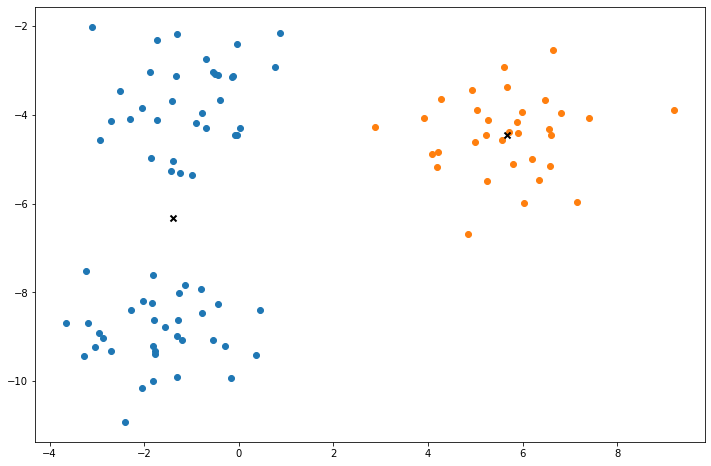

In [12]:
# Try some other values of clusters
k = K_Means(K= 2, max_iters= 150, plot_steps= True)
y_pred = k.fit(X1)

k.plot()

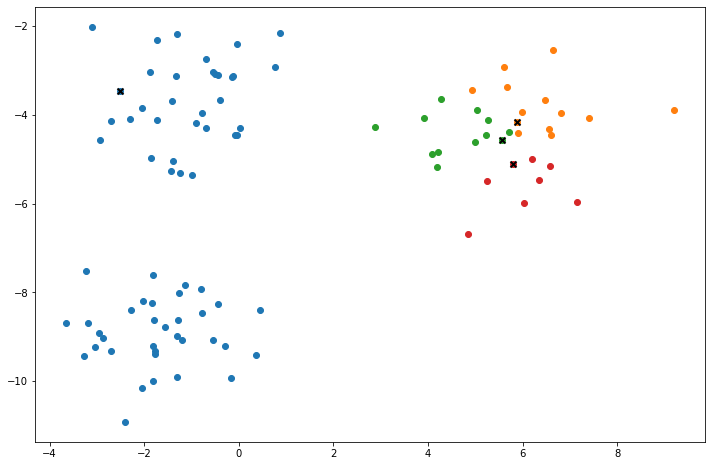

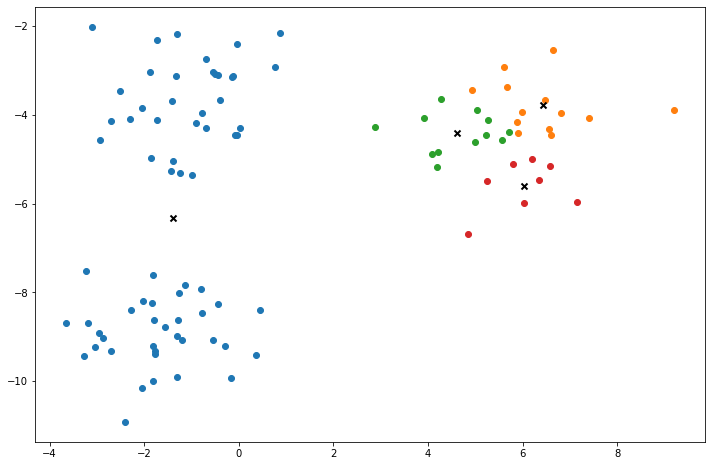

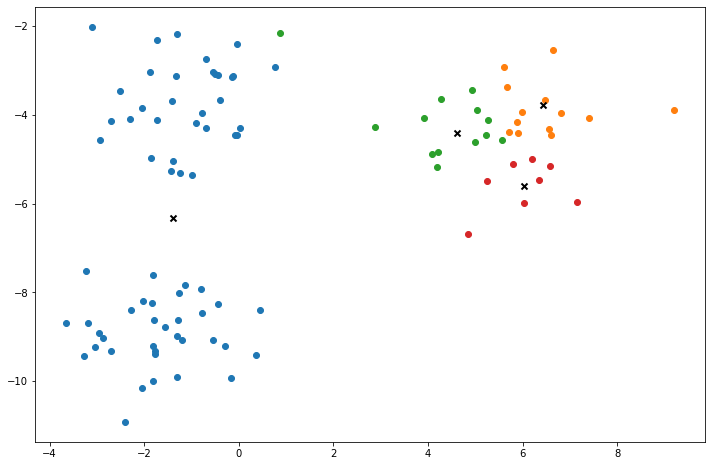

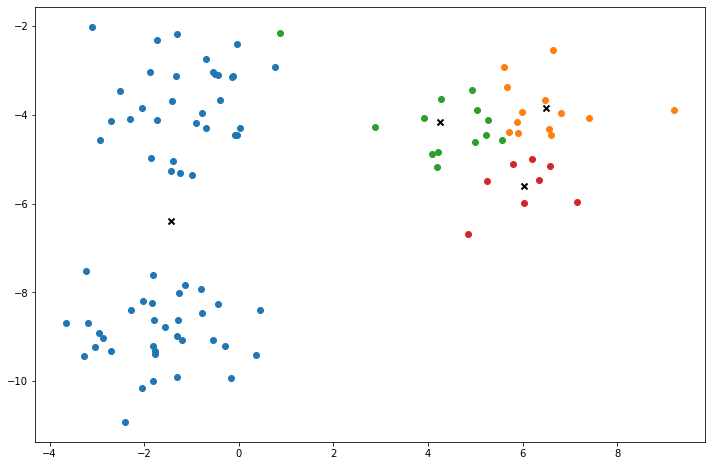

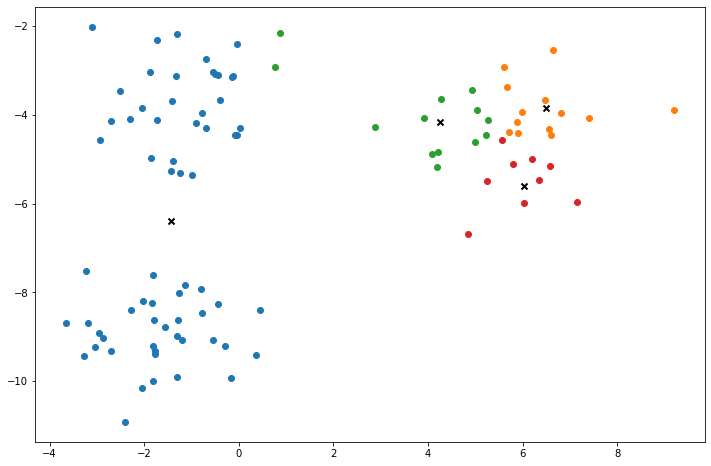

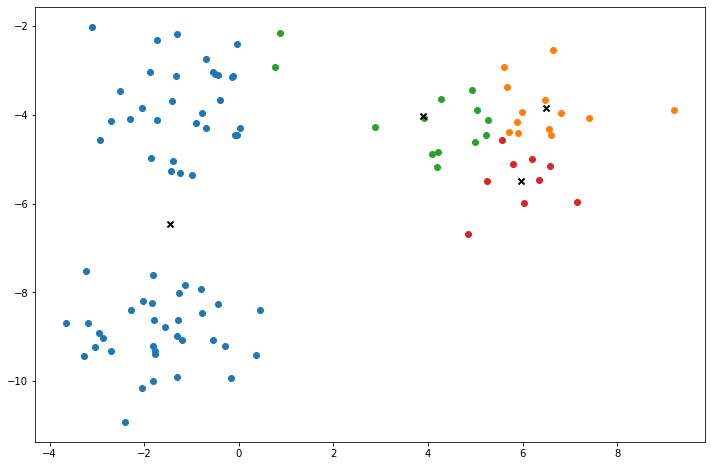

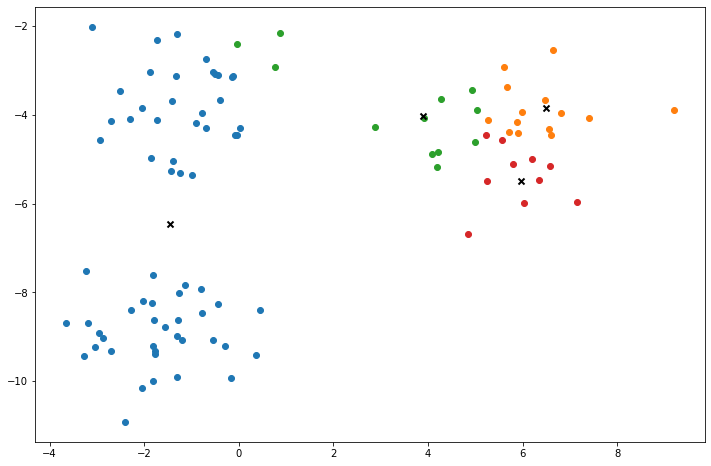

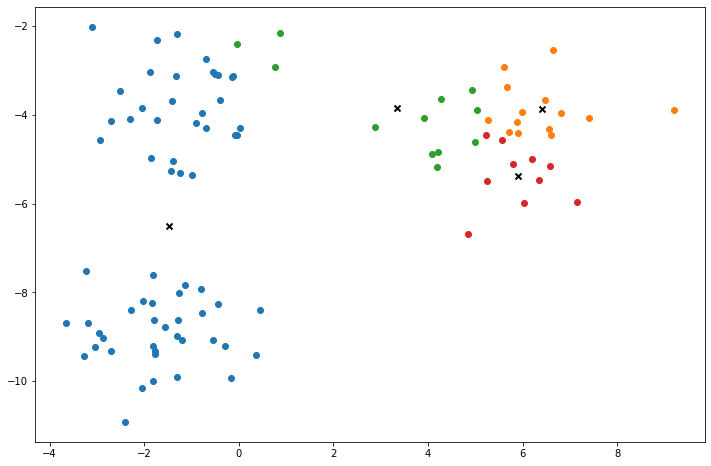

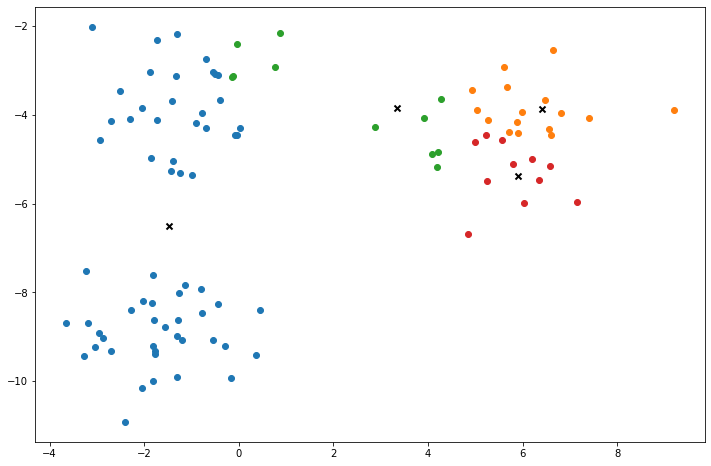

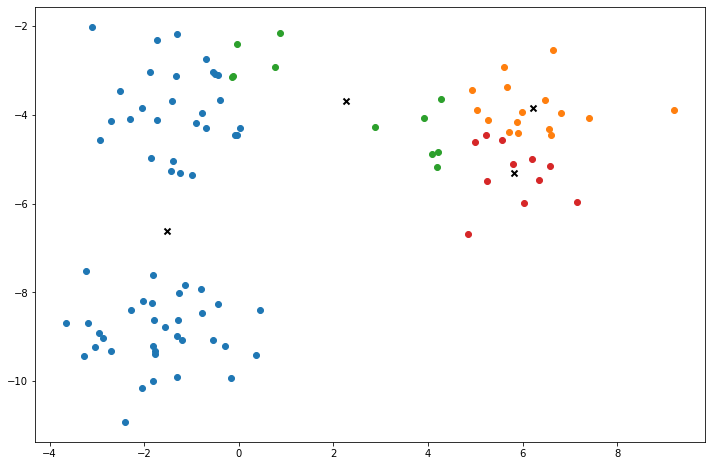

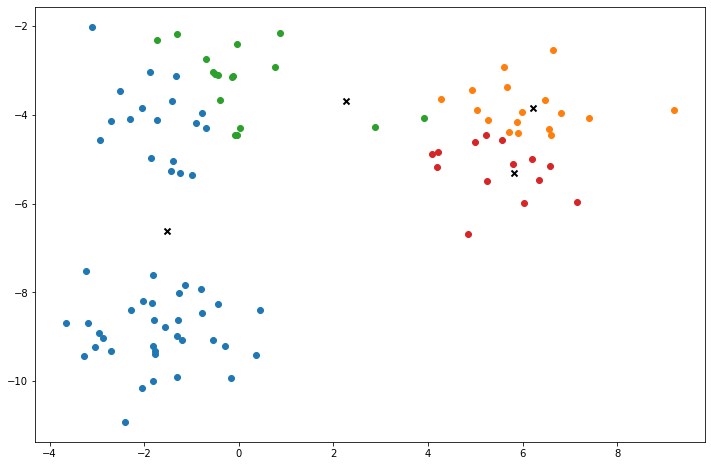

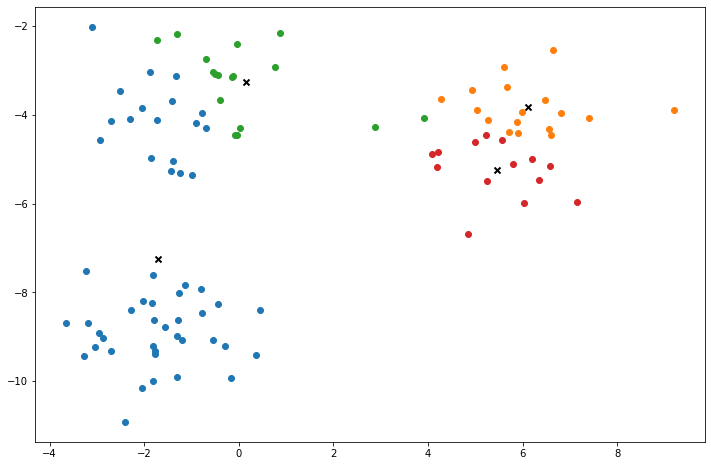

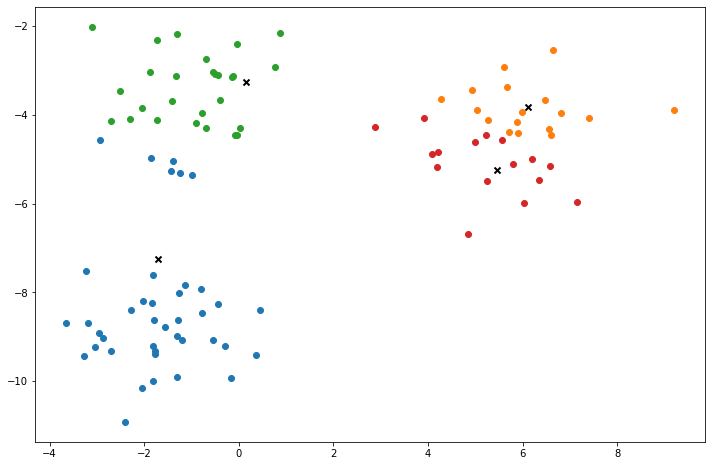

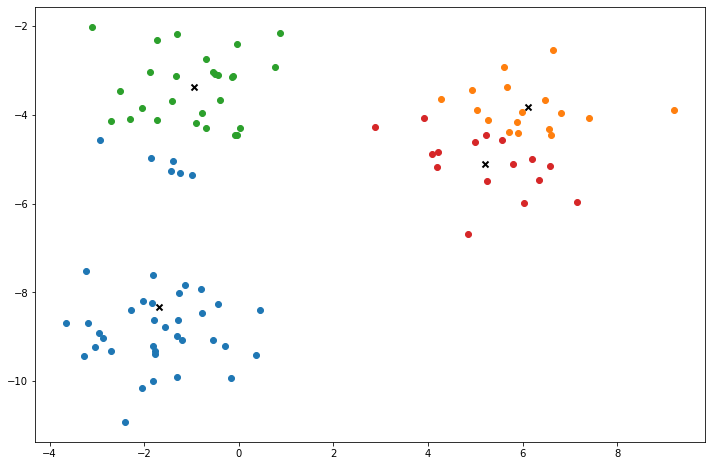

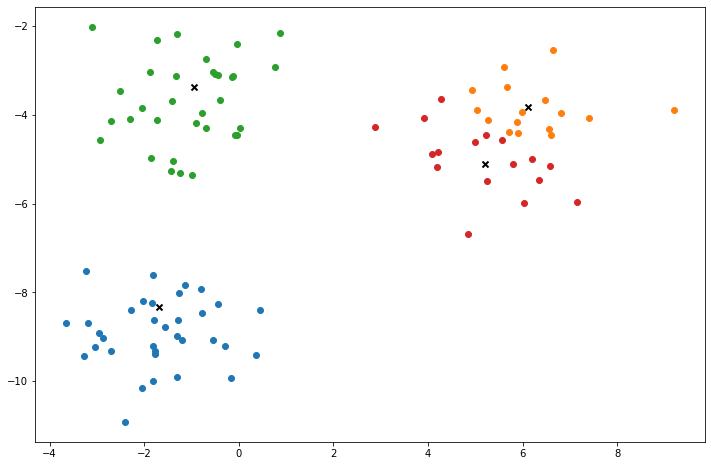

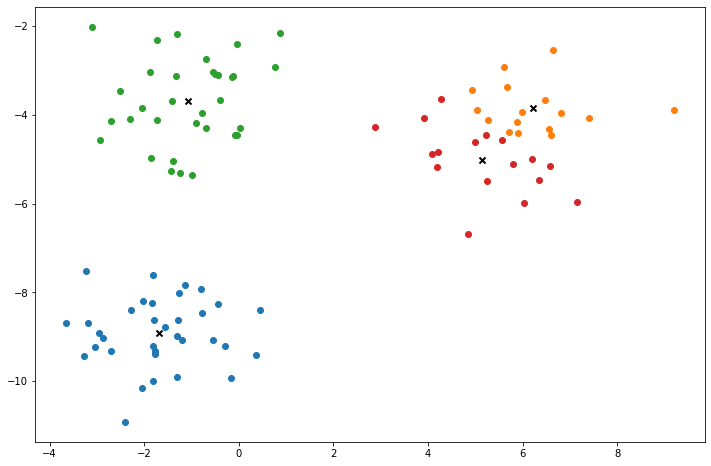

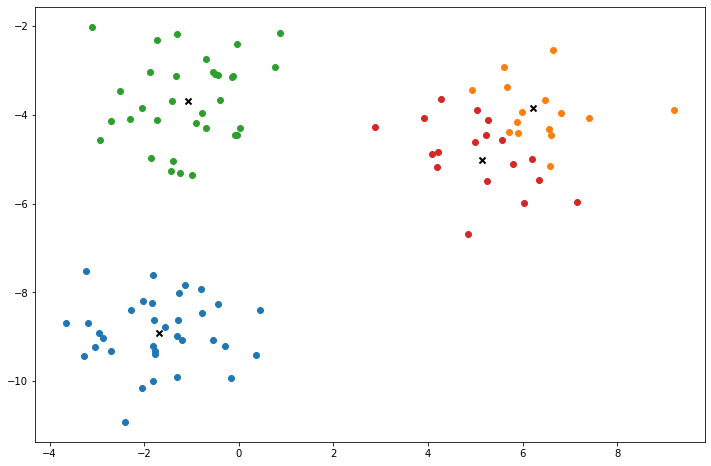

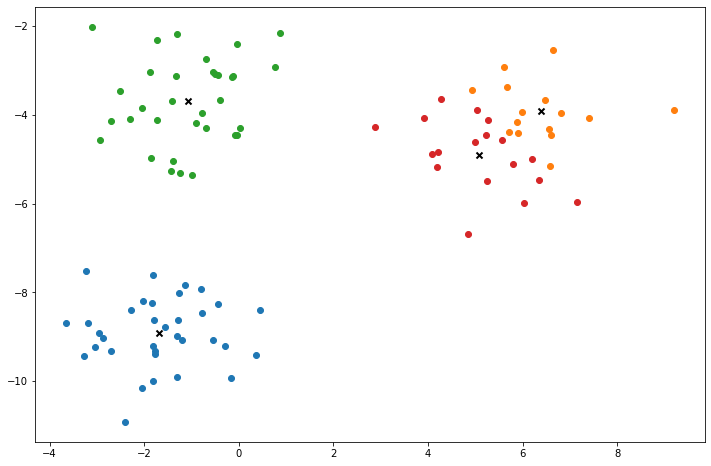

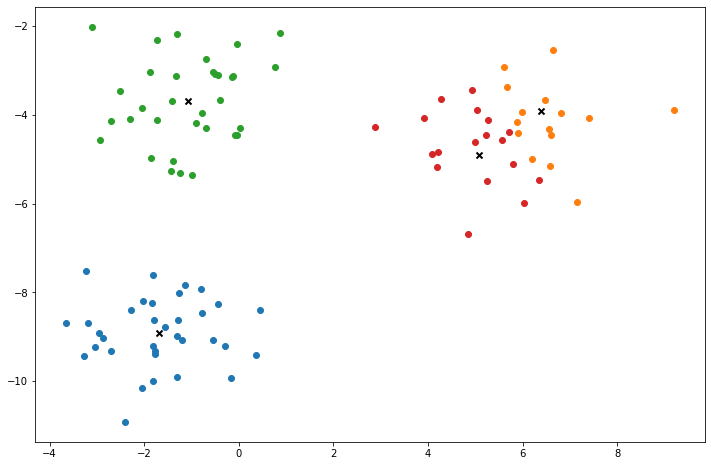

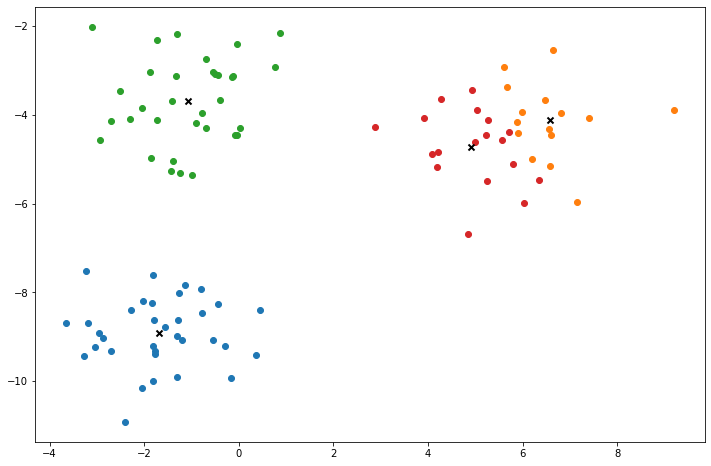

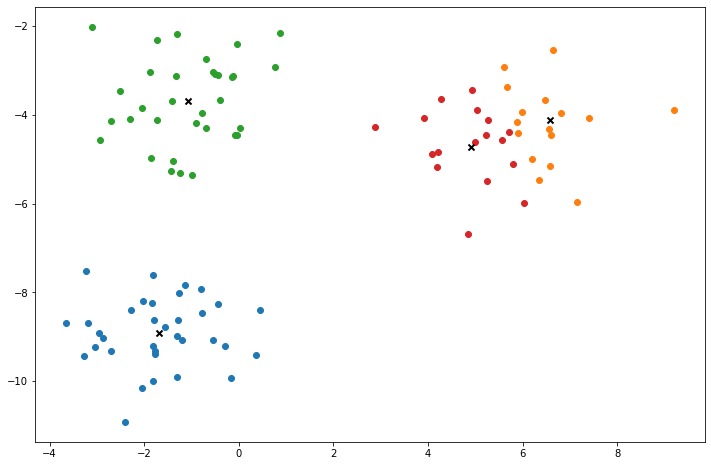

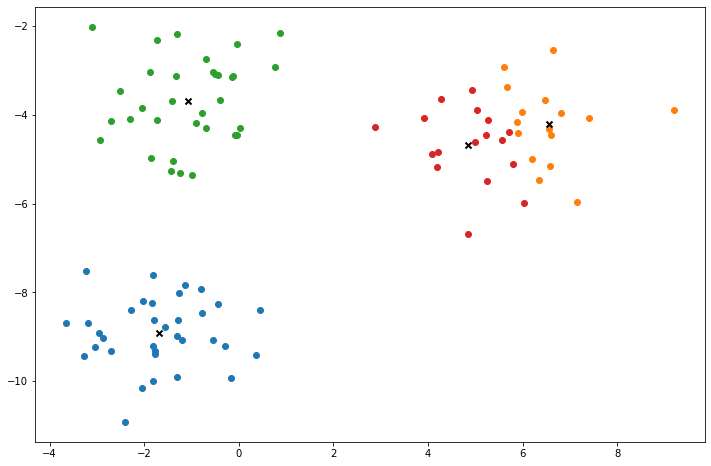

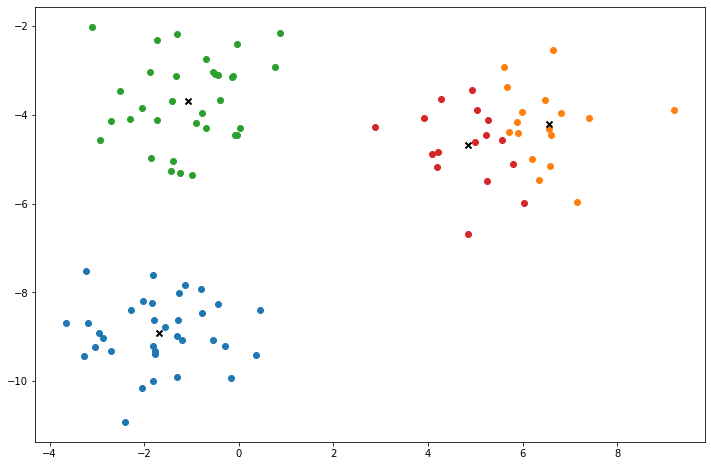

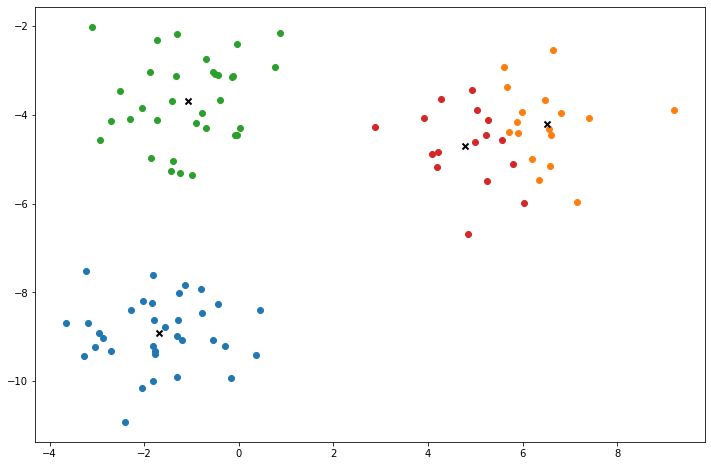

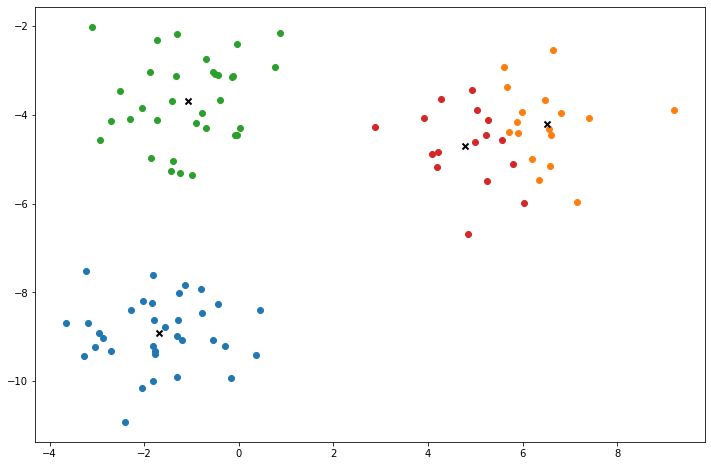

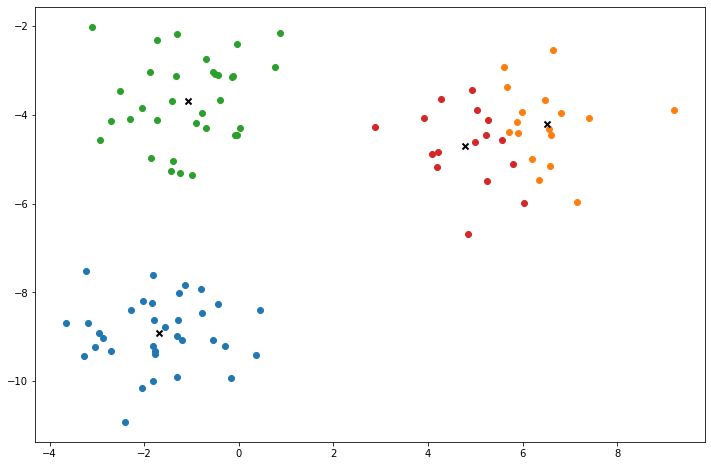

In [13]:
k = K_Means(K= 4, max_iters= 150, plot_steps= True)
y_pred = k.fit(X1)

k.plot()

# 3. Read and understand how to choose k (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/), draw the elbow for the above dataset.

In [14]:
%matplotlib inline 
from sklearn.cluster import KMeans
import pandas as pd

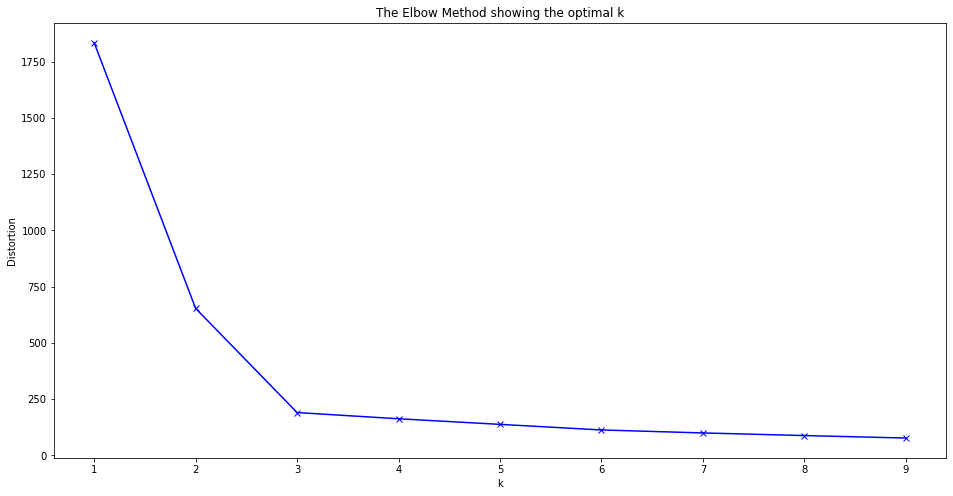

In [15]:
df = pd.DataFrame(X1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

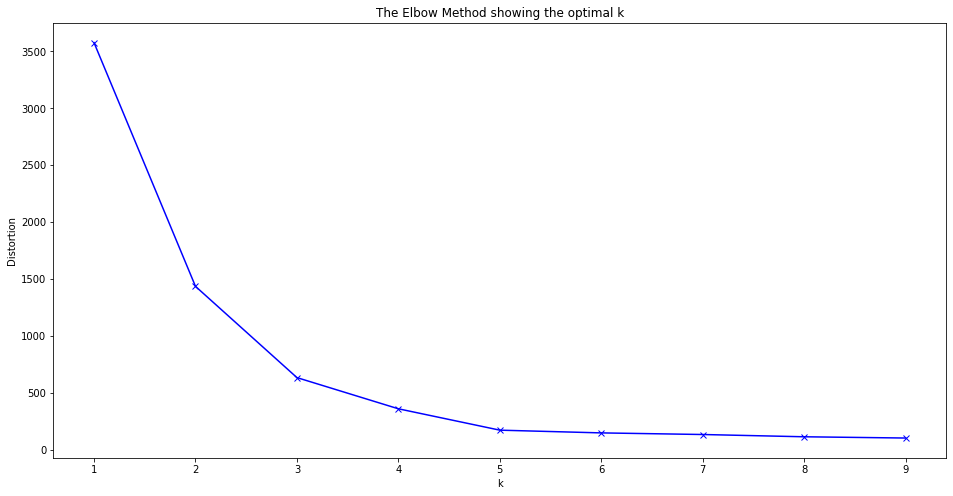

In [16]:
df = pd.DataFrame(X2)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

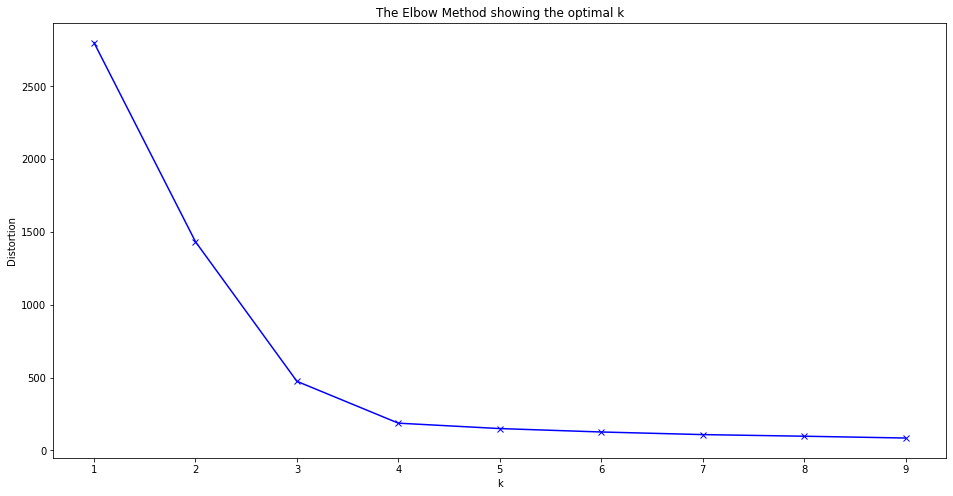

In [17]:
df = pd.DataFrame(X3)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# 4. Read the limitation of kmean (https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages), find at least three example k-mean doesn't work.

kmeans algorithm doesn’t let data points that are far-away from each other share the same cluster even though they obviously belong to the same cluster. 

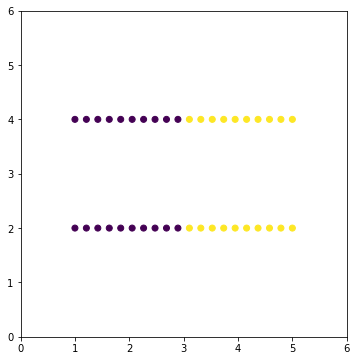

In [18]:
# an example of data points on two different horizontal lines
X = np.tile(np.linspace(1, 5, 20), 2)
y = np.repeat(np.array([2, 4]), 20)
df = np.c_[X, y]

km = KMeans(n_clusters=2)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X, y, c=labels)
plt.xlim([0, 6])
plt.ylim([0, 6])
ax.set_aspect('equal')

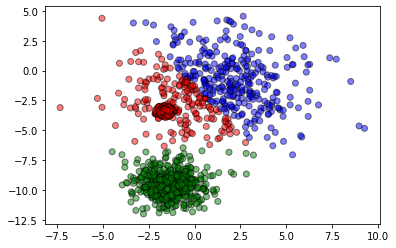

In [19]:
# an example of data from three different multivariate distributions
fig, ax = plt.subplots()

X, y = make_blobs(n_samples= 1400,
    cluster_std=[1.0, 2.5, 0.2],
    random_state=2)

y_pred = KMeans(n_clusters=3, random_state=2).fit_predict(X)
colors = [['r', 'g', 'b'][c] for c in y_pred]

plt.scatter(X[:, 0], X[:, 1], color=colors, edgecolor='k', alpha=0.5)
plt.show()

Since it tries to minimize the within-cluster variation, it gives more weight to bigger clusters than smaller ones. In other words, data points in smaller clusters may be left away from the centroid in order to focus more on the larger cluster.

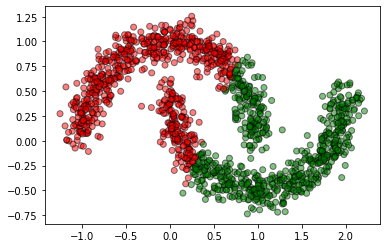

In [20]:
from sklearn.datasets import make_moons

# irregular shaped data
X, y = make_moons(n_samples=1400, shuffle=True, noise=0.1, random_state=120)
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(X)
colors = [['r', 'g', 'b'][c] for c in y_pred]

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=colors, edgecolor='k', alpha=0.5)

plt.show()

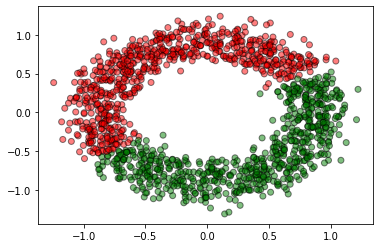

In [21]:
from sklearn.datasets import make_circles

# irregular shaped data
X, y = make_circles(n_samples=1400, shuffle=True, noise=0.1, random_state=120)
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(X)
colors = [['r', 'g', 'b'][c] for c in y_pred]

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=colors, edgecolor='k', alpha=0.5)

plt.show()